<a href="https://colab.research.google.com/github/DimasAdhie12/Visi-Komputer/blob/main/Jobsheet%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

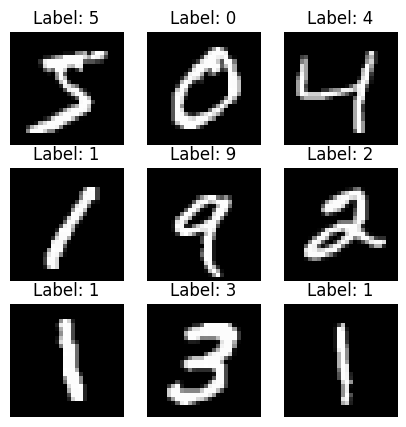

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i], cmap='gray')
 plt.title(f"Label: {y_train[i]}")
 plt.axis('off')
plt.show()

###Tugas Kecil

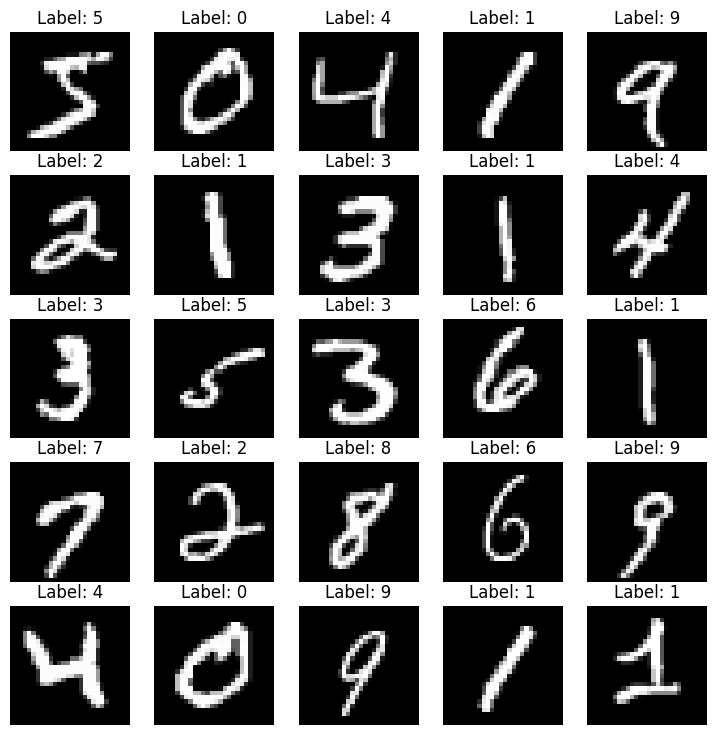

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(9, 9))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

###Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [3]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0
# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM  berat
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


###Tugas Kecil

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten (ubah 28x28 jadi 784 vektor & normalisasi 0–1)
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset agar lebih ringan

# Prediksi
y_pred = clf.predict(x_test_flat)

# Akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


###Praktikum D3 – Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.8924 - loss: 0.3602 - val_accuracy: 0.9787 - val_loss: 0.0783
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9810 - loss: 0.0642 - val_accuracy: 0.9828 - val_loss: 0.0622
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9864 - loss: 0.0443 - val_accuracy: 0.9873 - val_loss: 0.0501
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9904 - loss: 0.0299 - val_accuracy: 0.9868 - val_loss: 0.0528
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9926 - loss: 0.0224 - val_accuracy: 0.9867 - val_loss: 0.0541


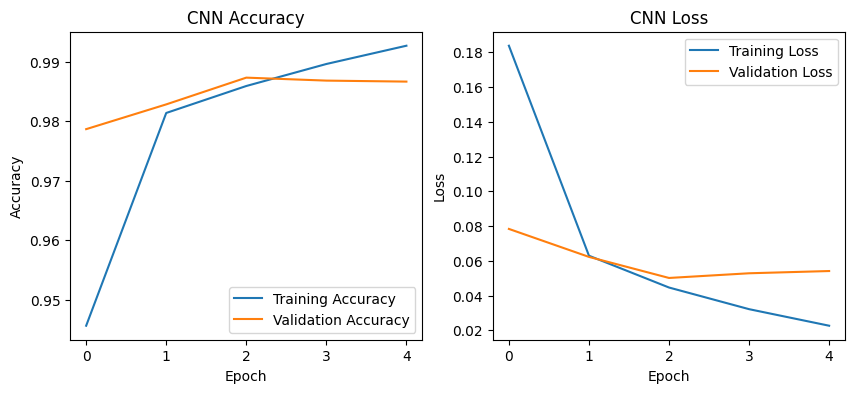

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0
model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Tugas Kecil

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9134 - loss: 0.2812

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 37ms/step - accuracy: 0.9134 - loss: 0.2811 - val_accuracy: 0.9867 - val_loss: 0.0489
Epoch 2/20
1686/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9867 - loss: 0.0418

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 74s 32ms/step - accuracy: 0.9867 - loss: 0.0418 - val_accuracy: 0.9887 - val_loss: 0.0450
Epoch 3/20
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9916 - loss: 0.0257

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9916 - loss: 0.0257 - val_accuracy: 0.9890 - val_loss: 0.0442
Epoch 4/20
1686/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9940 - loss: 0.0178

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9940 - loss: 0.0178 - val_accuracy: 0.9885 - val_loss: 0.0431
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.9897 - val_loss: 0.0438
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.9971 - loss: 0.0082 - val_accuracy: 0.9893 - val_loss: 0.0494
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9975 - loss: 0.0066 - val_accuracy: 0.9892 - val_loss: 0.0478

Akurasi di data test: 0.9874, Loss: 0.0381


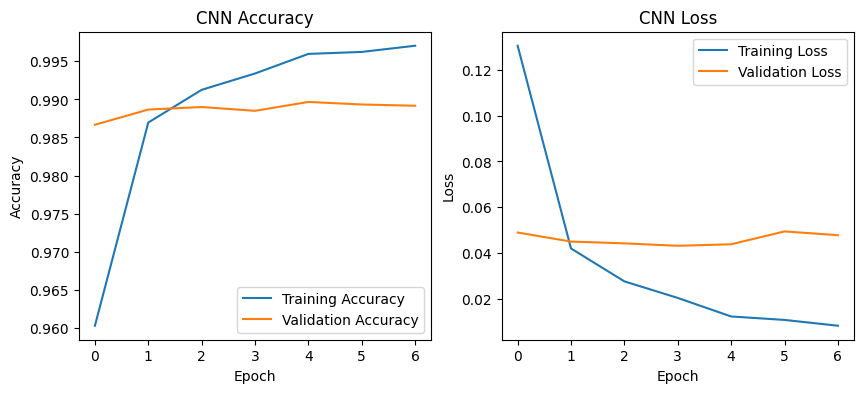

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# === Preprocessing data (anggap data sudah ada: x_train, y_train, x_test, y_test) ===
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# === Definisi model CNN ===
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# === Kompilasi model ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === Callbacks ===
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_cnn_model.h5", save_best_only=True)

# === Latih model ===
history = model.fit(
    x_train_cnn, y_train,
    epochs=20,                 # Bisa lebih banyak, nanti berhenti otomatis
    validation_split=0.1,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# === Evaluasi di data test ===
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"\nAkurasi di data test: {test_acc:.4f}, Loss: {test_loss:.4f}")

# === Plot hasil training ===
plt.figure(figsize=(10,4))

# Plot akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


###Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 49ms/step - accuracy: 0.3702 - loss: 1.7289 - val_accuracy: 0.5484 - val_loss: 1.2690
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.5925 - loss: 1.1587 - val_accuracy: 0.6448 - val_loss: 1.0254
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.6515 - loss: 0.9957 - val_accuracy: 0.6610 - val_loss: 0.9694
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.6846 - loss: 0.9093 - val_accuracy: 0.6608 - val_loss: 0.9916
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.7117 - loss: 0.8386 - val_accuracy: 0.6950 - val_loss: 0.9047
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7285 - loss: 0.7749 - val_accuracy: 0.7018 - val_loss: 0.8832
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7485 - loss: 0.7255 - val_accuracy: 0.6930 - val_loss: 0.9046
Epoch 8/10
1407/1407 ━━

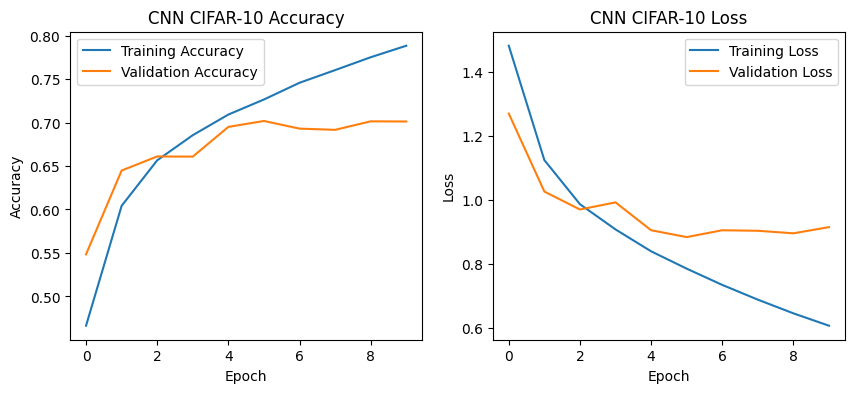

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Tugas Kecil

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 39ms/step - accuracy: 0.2757 - loss: 1.9353 - val_accuracy: 0.5180 - val_loss: 1.3597
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.4569 - loss: 1.4931 - val_accuracy: 0.5662 - val_loss: 1.2090
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.5004 - loss: 1.3717 - val_accuracy: 0.6078 - val_loss: 1.1339
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.5320 - loss: 1.2895 - val_accuracy: 0.6356 - val_loss: 1.0571
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.5560 - loss: 1.2260 - val_accuracy: 0.6492 - val_loss: 0.9994
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.5870 - loss: 1.1610 - val_accuracy: 0.6580 - val_loss: 1.0099
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 39ms/step - accuracy: 0.5963 - loss: 1.1266 - val_accuracy: 0.6526 - val_loss: 0.9907
Epoch 8/10
1407/1407 ━━

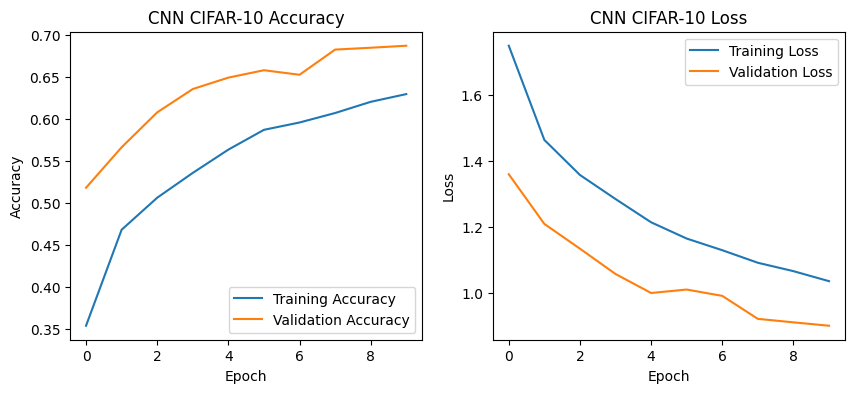

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# === Load dataset CIFAR-10 ===
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# === Definisi model CNN dengan Dropout ===
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Tambahan Dropout
    layers.Dense(10, activation='softmax')
])

# === Kompilasi model ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === Training model ===
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# === Plot hasil training ===
plt.figure(figsize=(10,4))

# Plot akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

###Praktikum D5 – Transfer Learning dengan Model Pra-Latih

x_train shape: (60000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 749s 441ms/step - accuracy: 0.8253 - loss: 0.6161 - val_accuracy: 0.9565 - val_loss: 0.1477
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 736s 436ms/step - accuracy: 0.9488 - loss: 0.1660 - val_accuracy: 0.9612 - val_loss: 0.1142
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 740s 435ms/step - accuracy: 0.9595 - loss: 0.1248 - val_accuracy: 0.9643 - val_loss: 0.1076
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 740s 433ms/step - accuracy: 0.9656 - loss: 0.1091 - val_accuracy: 0.9700 - val_loss: 0.0936
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 741s 433ms/step - accuracy: 0.9686 - loss: 0.0995 - val_accuracy: 0.9688 - val_loss: 0.0931


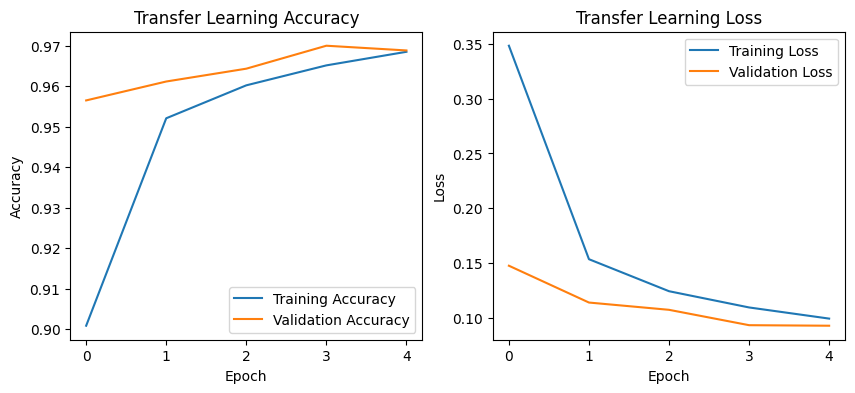

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# ==== Load dataset MNIST ====
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi ke range 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# ==== Ubah bentuk agar sesuai dengan VGG16 (32x32 RGB) ====
# Tambah channel → resize → konversi ke RGB
x_train = tf.image.resize(x_train[..., tf.newaxis], [32, 32])
x_train = tf.image.grayscale_to_rgb(x_train)

x_test = tf.image.resize(x_test[..., tf.newaxis], [32, 32])
x_test = tf.image.grayscale_to_rgb(x_test)

print("x_train shape:", x_train.shape)  # (60000, 32, 32, 3)
print("x_test shape:", x_test.shape)    # (10000, 32, 32, 3)

# ==== Bangun model dengan VGG16 ====
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # freeze weights

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ==== Training ====
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ==== Plot history ====
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


###Tugas Kecil

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 602s 427ms/step - accuracy: 0.5082 - loss: 1.4002 - val_accuracy: 0.6122 - val_loss: 1.0949
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 652s 448ms/step - accuracy: 0.6260 - loss: 1.0648 - val_accuracy: 0.6242 - val_loss: 1.0383
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 652s 427ms/step - accuracy: 0.6587 - loss: 0.9707 - val_accuracy: 0.6504 - val_loss: 1.0029
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 629s 447ms/step - accuracy: 0.6823 - loss: 0.9115 - val_accuracy: 0.6598 - val_loss: 0.9704
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 627s 446ms/step - accuracy: 0.6967 - loss: 0.8571 - val_accuracy: 0.6658 - val_loss: 0.9576


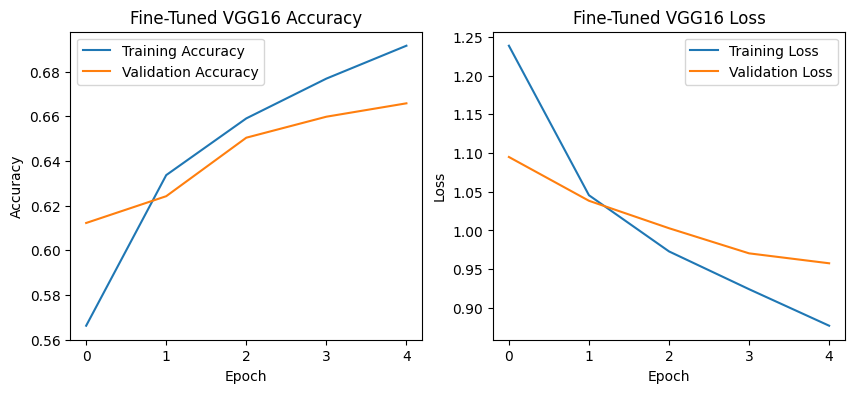

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# === Load base model VGG16 (pretrained) ===
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32,32,3))

# Awalnya freeze semua layer
base_model.trainable = True
for layer in base_model.layers[:-2]:  # Bekukan semua kecuali 2 lapisan terakhir
    layer.trainable = False

# === Definisi model Transfer Learning dengan Fine-tuning ===
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# === Kompilasi model ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === Training model ===
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# === Plot hasil training ===
plt.figure(figsize=(10,4))

# Plot akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fine-Tuned VGG16 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Fine-Tuned VGG16 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

###Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 130s 416ms/step
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      1000
           1       0.66      0.65      0.66      1000
           2       0.56      0.47      0.51      1000
           3       0.49      0.38      0.43      1000
           4       0.55      0.53      0.54      1000
           5       0.51      0.60      0.55      1000
           6       0.56      0.72      0.63      1000
           7       0.66      0.68      0.67      1000
           8       0.77      0.65      0.70      1000
           9       0.62      0.59      0.61      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



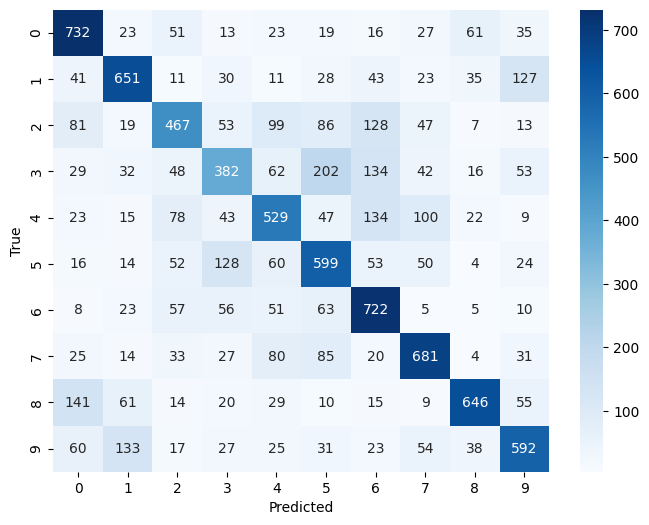

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

###Penugasan

In [28]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit jadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    # Tambah channel dim (28,28,1)
    arr = arr[..., None]
    return canvas, arr

Saving Screenshot 2025-09-20 174333.png to Screenshot 2025-09-20 174333.png


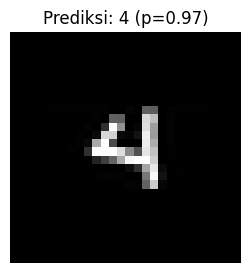

Rekap Prediksi (CNN):
- Screenshot 2025-09-20 174333.png -> 4 (p=0.970)


In [29]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

results = []

for fname in uploaded.keys():
    img_pil = Image.open(fname)
    # disp: gambar PIL untuk ditampilkan, x: array (28,28,1)
    disp, x = preprocess_to_mnist_28x28(img_pil)

    # Tambahkan batch dimensi -> (1,28,28,1)
    x_batch = np.expand_dims(x, axis=0)

    # Prediksi dengan CNN MNIST
    probs = model.predict(x_batch, verbose=0)[0]  # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap hasil ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")